In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 16
IMAGE_SIZE= 256
CHANNELS = 3
EPOCHS = 10


In [3]:
dataset =tf.keras.preprocessing.image_dataset_from_directory("train" , shuffle=True, image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE)

Found 5702 files belonging to 3 classes.


In [4]:
class_names= dataset.class_names
dataset.class_names
print("Classes:", dataset.class_names)

Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 256, 256, 3)
[1 1 1 2 2 0 1 0 1 2 2 2 1 0 1 1]


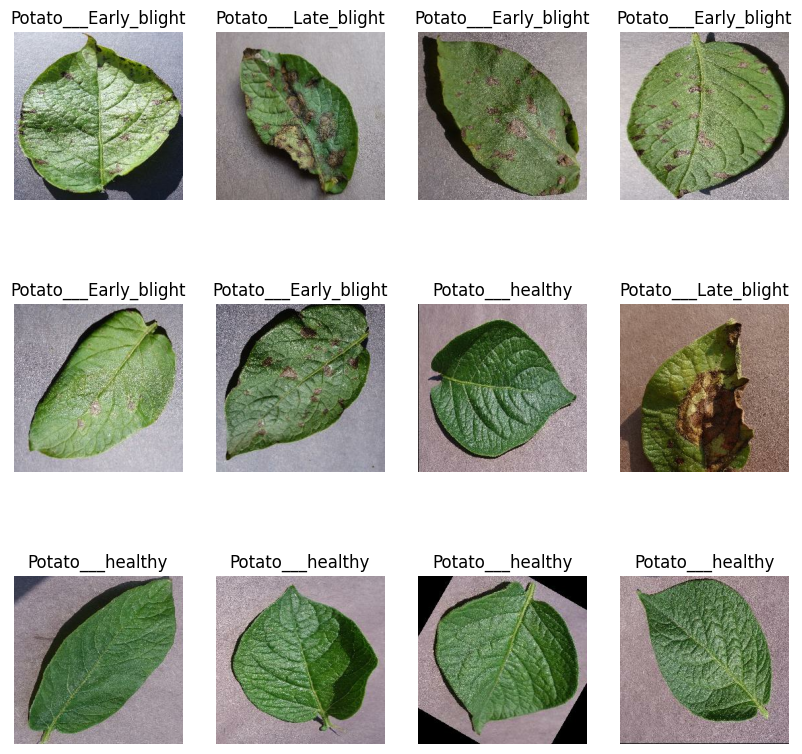

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
      

In [7]:
train_size =0.8
len(dataset)*train_size

285.6

In [8]:
train_ds = dataset.take(143)
len(train_ds)


143

In [9]:
test_ds = dataset.skip(143)
len(test_ds)

214

In [10]:
val_size=0.1
len(dataset)*val_size

35.7

In [11]:
val_ds = test_ds.take(17)
len(val_ds)

17

In [12]:
test_ds = test_ds.skip(17)
len(test_ds)

197

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split)  == 1
     
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

         
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

285

In [16]:
len(val_ds)

35

In [17]:

len(test_ds)

37

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)

(256, 256, 3)


In [20]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1.0/255),
])

In [21]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [22]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  

n_classes = 3

model = models.Sequential([
    layers.Input(shape=input_shape),  
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ sequential (Sequential)       │ (None, 256, 256, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d (Conv2D)               │ (None, 254, 254, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 127, 127, 32)  │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 125, 125, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 62, 62, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 60, 60, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 30, 30, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ (None, 28, 28, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_3               │ (None, 14, 14, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_4 (Conv2D)             │ (None, 12, 12, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (None, 6, 6, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_5 (Conv2D)             │ (None, 4, 4, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (None, 2, 2, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 64)            │       16,448 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 3)             │          195 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 111s 362ms/step - accuracy: 0.4618 - loss: 0.9831 - val_accuracy: 0.8536 - val_loss: 0.3860
Epoch 2/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 96s 337ms/step - accuracy: 0.8375 - loss: 0.3991 - val_accuracy: 0.9000 - val_loss: 0.2697
Epoch 3/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 93s 325ms/step - accuracy: 0.9329 - loss: 0.1903 - val_accuracy: 0.9607 - val_loss: 0.1154
Epoch 4/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 78s 273ms/step - accuracy: 0.9537 - loss: 0.1335 - val_accuracy: 0.9696 - val_loss: 0.0772
Epoch 5/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 81s 284ms/step - accuracy: 0.9704 - loss: 0.0760 - val_accuracy: 0.9786 - val_loss: 0.0558
Epoch 6/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 79s 278ms/step - accuracy: 0.9787 - loss: 0.0584 - val_accuracy: 0.9929 - val_loss: 0.0329
Epoch 7/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 66s 230ms/step - accuracy: 0.9801 - loss: 0.0601 - val_accuracy: 0.9821 - val_loss: 0.0485
Epoch 8/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 62s 216ms/step - accuracy: 0.9833 - loss: 

In [25]:
len(test_ds)

37

In [26]:
scores=model.evaluate(test_ds)

37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9966 - loss: 0.0178


In [27]:
scores

[0.03176048398017883, 0.9881756901741028]

In [28]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 285}

In [29]:
history.history['loss']

[0.8100777268409729,
 0.3487250804901123,
 0.17338038980960846,
 0.13963788747787476,
 0.07540083676576614,
 0.07318457216024399,
 0.051088087260723114,
 0.0609140507876873,
 0.05883008986711502,
 0.02614612877368927]

In [30]:
history.history['accuracy']

[0.6021978259086609,
 0.8615384697914124,
 0.9389011263847351,
 0.9496703147888184,
 0.9734066128730774,
 0.9734066128730774,
 0.9835164546966553,
 0.977142870426178,
 0.9789010882377625,
 0.9918681383132935]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

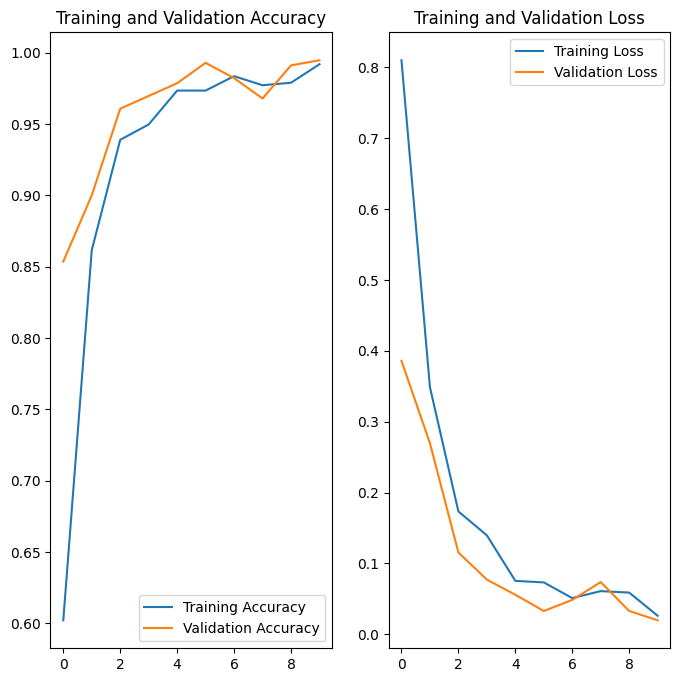

In [32]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Image To Predict
Actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Predicted Label: Potato___Late_blight


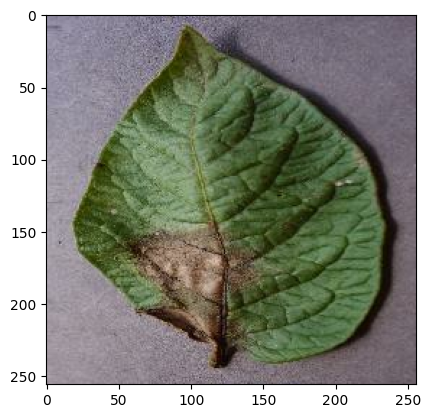

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("Image To Predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


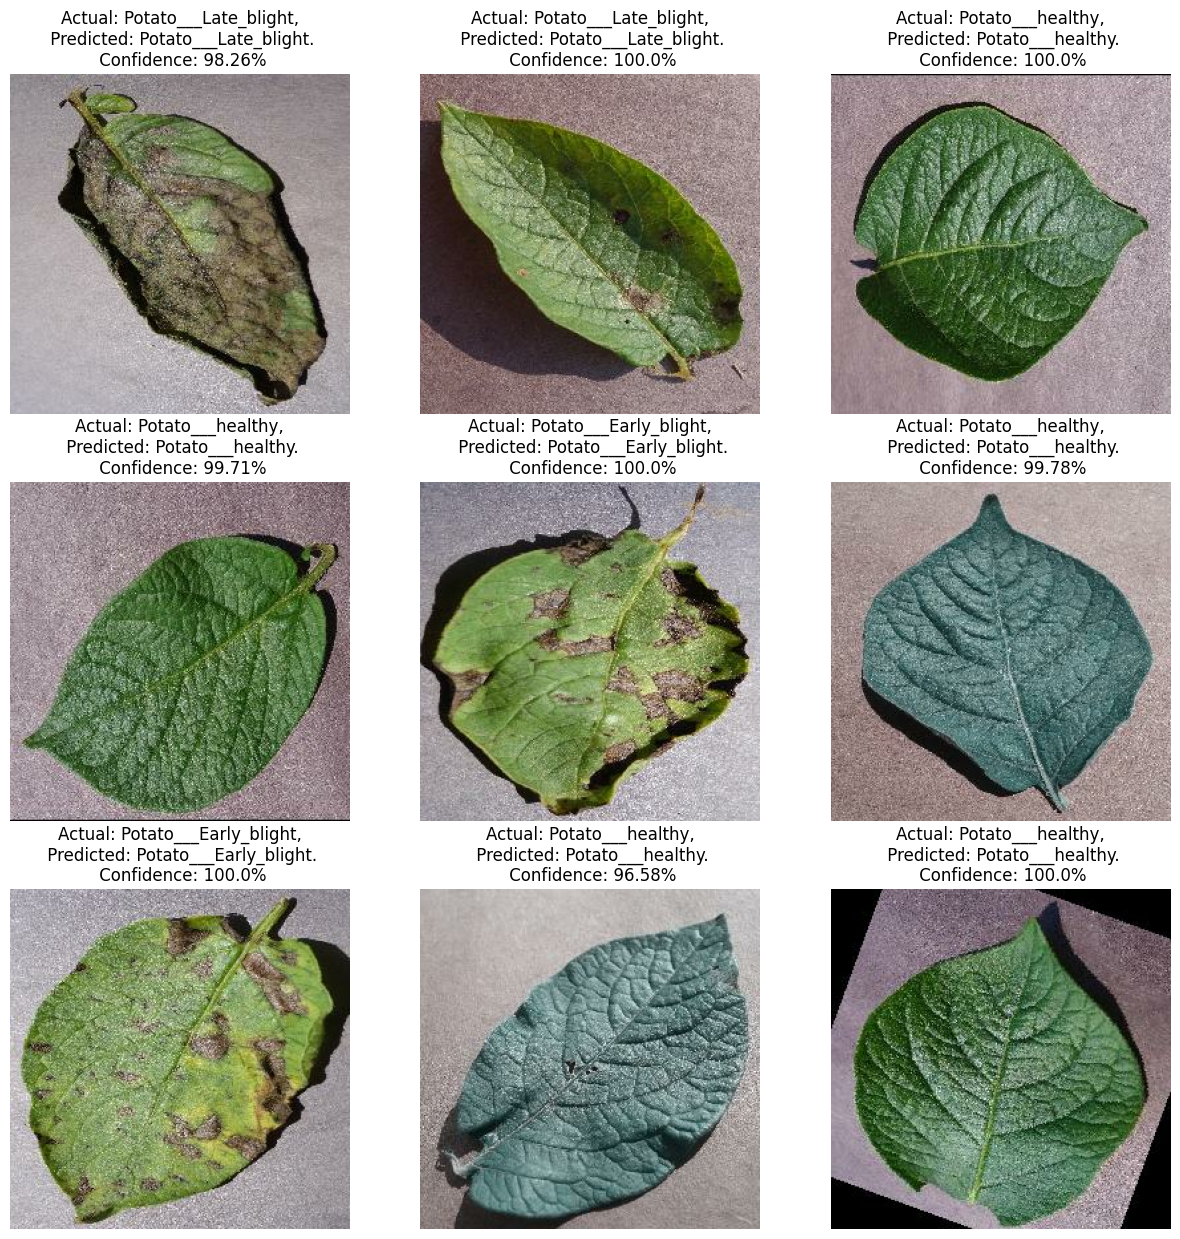

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [36]:
model.save('newmodel.keras')
